<a href="https://colab.research.google.com/github/sarithamiryala/DeepLearning/blob/main/POC_for_Convolution_and_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import os

ROOT ="/content/drive/MyDrive/DataScience2024/DeepLearning/CNN"
os.chdir(ROOT)

In [60]:
car_image_path = "car1.jpeg"

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [74]:

def read_image(path,grayscale=True):
  car = cv2.imread(path)
  if grayscale:
    car = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)
  plt.imshow(car,cmap="gray")
  plt.show()
  return car

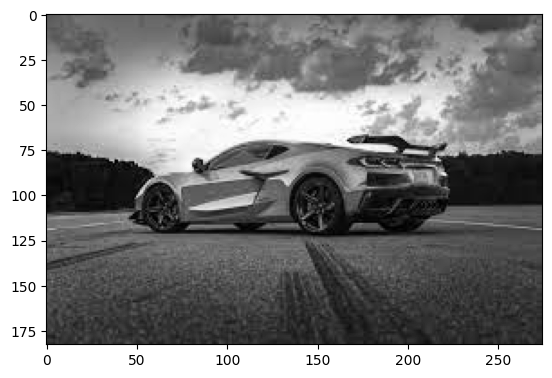

In [75]:

car = read_image(car_image_path)

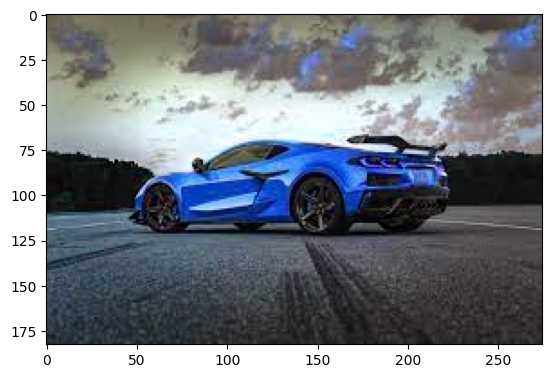

In [76]:
car_colour = read_image(car_image_path,grayscale=False)

In [78]:
car_colour.shape

(183, 275, 3)

In [79]:
row,col = car.shape
car = car.reshape((1,row,col,1))
#colour_car = car_colour.reshape((1,row,col,3))
car.shape

(1, 183, 275, 1)

In [80]:

CONV_LAYER = [tf.keras.layers.Conv2D(filters =1 ,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    input_shape= car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 181, 273, 1)         │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
#Trainable Parameters
# 3*3+1

In [81]:
out = conv_model.predict(car)
out.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


(1, 181, 273, 1)

In [56]:
(183-3+0)//1+1

181

In [57]:
(275-3+0)//1+1

273

TypeError: Invalid shape (1, 181, 273, 1) for image data

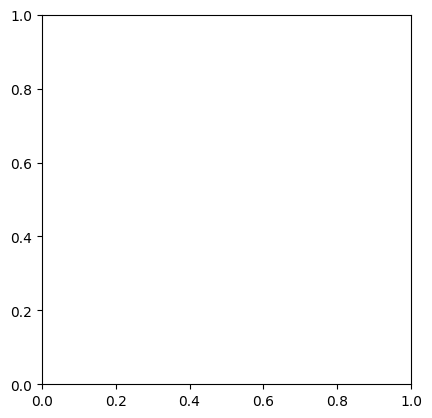

In [83]:
plt.imshow(out,cmap="gray")

In [84]:
row,col = out.shape[1],out.shape[2]

In [85]:
reshaped_out = out.reshape(row,col)
reshaped_out

array([[37.13161  , 37.55077  , 38.446278 , ..., 47.3709   , 43.231506 ,
        41.600197 ],
       [37.87499  , 37.89929  , 37.791946 , ..., 46.04226  , 34.42624  ,
        40.82676  ],
       [38.385975 , 38.116173 , 39.524796 , ..., 30.009384 , 23.696362 ,
        46.14693  ],
       ...,
       [18.51236  , 17.726675 , 18.603735 , ..., 22.06504  , 23.833006 ,
        18.952066 ],
       [22.86778  , 22.519703 , 25.825886 , ..., 28.779882 , 22.858194 ,
        15.798976 ],
       [16.79477  , 17.378418 , 18.751461 , ..., 23.923477 , 13.7125635,
        15.277303 ]], dtype=float32)

In [86]:
reshaped_out.shape

(181, 273)

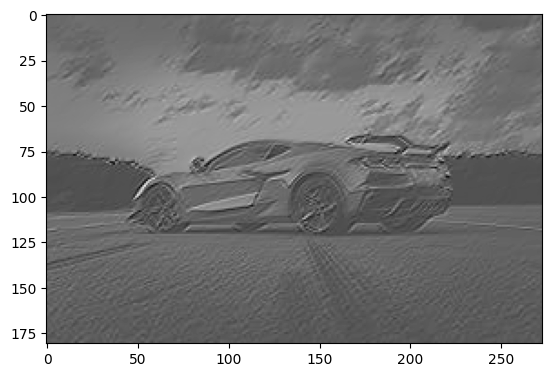

In [87]:
plt.imshow(reshaped_out,cmap="gray")

#For Color Image

In [89]:
row,col,depth = car_colour.shape
color_car = car_colour.reshape((1,row,col,depth))
color_car.shape

(1, 183, 275, 3)

In [90]:

CONV_LAYER = [tf.keras.layers.Conv2D(filters =1 ,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    input_shape= color_car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 181, 273, 1)         │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
# 3*3*3 +1

In [92]:
out = conv_model.predict(color_car)
out.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


(1, 181, 273, 1)

In [98]:
row, col = out.shape[1:-1]
reshaped_out = out.reshape(row,col)
reshaped_out.shape

(181, 273)

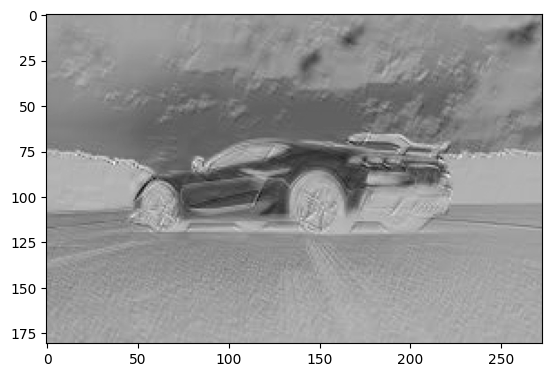

In [100]:
plt.imshow(reshaped_out,cmap="gray")